## Pandas Series Exercises -- revised after walkthrough

In [1]:
# importing NumPy, Pandas and MatPlotLib.pyplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# adjusting rc settings for figure size

plt.rc('figure', figsize=(12, 6))

**1. Use pandas to create a Series from the following data:**

```["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]```

   **a. Name the variable that holds the series ```fruits```.**

In [2]:


#Created a list of fruit

fruits = ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]

#Create the fruit series using the Series() constructor method

fruits = pd.Series(fruits)
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

   **b. Run ```.describe()``` on the series to see what describe returns for a series of strings.**

In [3]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

   **c. Run the code necessary to produce only the unique fruit names.**

In [4]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [6]:
print(f'Calling the `.unique()` method on a Series returns a {type(fruits.unique())}.')

Calling the `.unique()` method on a Series returns a <class 'numpy.ndarray'>.


**If I wanted to know the number of unique fruit names:**

In [8]:
fruits.nunique()

13

   **d. Determine how many times each value occurs in the series.**

In [4]:
fruits.value_counts()

kiwi                4
mango               2
blackberry          1
honeydew            1
strawberry          1
pineapple           1
papaya              1
blueberry           1
gala apple          1
tomato              1
honeycrisp apple    1
gooseberry          1
watermelon          1
dtype: int64

In [11]:
print(f'Calling the .value_counts() method on a Series returns a {type(fruits.value_counts())}.')

Calling the .value_counts() method on a Series returns a <class 'pandas.core.series.Series'>.


   **e. Determine the most frequently occurring fruit name from the series.**

In [5]:
fruits.value_counts().head(1)

kiwi    4
dtype: int64

#### <font color = "red"> **A better way:**<font>

In [13]:
# .idxmax() returns the index or row label with the max value. This returns only the first occurance of the max value.
fruits.value_counts().idxmax()

'kiwi'

#### <font color = "red"> **An even better way:  nlargest**<font>

In [15]:
# better because you would see any 'ties' for largest

fruits.value_counts().nlargest(n=1, keep='all')

kiwi    4
dtype: int64

   **f. Determine the least frequently occurring fruit name from the series.**

In [17]:
fruits.value_counts().nsmallest(keep='all')

pineapple           1
blackberry          1
watermelon          1
gala apple          1
gooseberry          1
strawberry          1
honeydew            1
tomato              1
blueberry           1
papaya              1
honeycrisp apple    1
dtype: int64

   **g. Write the code to get the longest string from the ```fruits``` series.**    

In [7]:
#BEST WAY:

longest_string = max(fruits, key = len)
print(f'The longest string is: {longest_string}')

The longest string is: honeycrisp apple


In [8]:
fruits.str.len().max()

16

#### Other ways to do the same:

In [19]:
#Find the max length for the elements in the Series.

max_len = fruits.str.len().max()
max_len

16

In [20]:
bool_fruits = fruits.str.len() == max_len
bool_fruits

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [21]:
# Indexing with boolean Series will identify the names that meet the condition:
fruits[bool_fruits]

5    honeycrisp apple
dtype: object

   **h. Find the fruit(s) with 5 or more letters in the name.**

In [9]:
fruits[fruits.str.len() >= 5].unique()

array(['mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [22]:
# Could have used boolean Series and indexed it:

fruits.str.len() >= 5

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13     True
14     True
15     True
16     True
dtype: bool

   **i. Capitalize all the fruit strings in the series.**
   
   NOTE: The ```.str``` attribute gives me access to vectorized string functions or methods, so I can perform the same manipulation on every element in the Series.  

**Unless I reassign the Series, the original Series has not changed.**

In [10]:
fruits.str.title()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [23]:
# note: original Series did not change
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

   **j. Count the letter "a" in all the fruits (use string vectorization)**
   
   The ```.count()``` string methodwill count the occurence of a string or regex patter in each string of a Series and return a series

In [27]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [34]:
# My first attempt does work as well

[x.count('a') for x in fruits]

[0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3]

   **k. Output the number of vowels in each and every fruit.**

In [28]:
#First attempt: create custom function to count vowels in each fruit:


# def count_vowels(string):
#     vowels = 0
#     for i in string:
#         if i in 'aeiou':
#             vowels += 1
#     return vowels

# A better way: 
vowels = list('aeiou')
def count_vowels(fruit):
    return len([i for i in fruit.lower() if i in vowels])

# use the .apply() methods to run function on series
fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [30]:
#### ANOTHER WAY TO DO ^^^:
# r indicates regex

vowel_counts = fruits.str.lower().str.count(r'[aeiou]')
vowel_counts

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [31]:
#Using a data frame to see the names and counts together

fruity_vowels = pd.DataFrame({'fruits': fruits, 'vowel_count': vowel_counts})
fruity_vowels

,fruits,vowel_count
0,kiwi,2
1,mango,2
2,strawberry,2
3,pineapple,4
4,gala apple,4
5,honeycrisp apple,5
6,tomato,3
7,watermelon,4
8,honeydew,3
9,kiwi,2


* **l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.**

In [32]:
fruits[fruits.apply(lambda s: s.count('o') > 1)]
      
    
    

6         tomato
15    gooseberry
dtype: object

Explanation of ^^^^:
Read this ```lambda``` function as, **'Return to me the fruit if the fruit meets my condition.'** Passing this to the ```apply()``` function, applies my lambda function to each value in my series ```fruits```.  

fruits in front produces the index and fruit name, rather than a boolean value ("Return to me the value in the 'fruits' Series WHERE my value is true")



In [33]:
# I could have also used a vectorized string method. 

fruits.str.count('o')


0     0
1     1
2     0
3     0
4     0
5     1
6     2
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    2
16    0
dtype: int64

* **m. Write the code to get only the fruits containing "berry" in the name**



In [14]:
fruits[fruits.str.contains('berry')]


2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

* **n. Write the code to get only the fruits containing "apple" in the name**




In [15]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

* **o. Which fruit has the highest amount of vowels?**

In [35]:
# Start by getting the count of vowels, as we did above. 
vowel_count = fruits.str.count(r'[aeiou]')
vowel_count

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [37]:
# Find the max count of vowels

max_vowels = (fruits.str.count(r'[aeiou]')).max()
max_vowels

5

In [39]:
# create a boolean Series comparing the count of vowels in original Series to my max count.

bool_series = fruits.str.count(r'[aeiou]')  == max_vowels
bool_series

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [40]:
# use loc[] to find  fruit by index location  
fruits.loc[5]

# or I could have used indexing to return rows that meet my condition.
#fruits[bool_series]

'honeycrisp apple'

2.  Use pandas to create a Series from the following data:

```['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']```

In [41]:
numbers = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

my_values = pd.Series(numbers)
my_values

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

* What is the data type of the series?

In [42]:
my_values.dtype  # object

dtype('O')

Use series operations to convert the series to a numeric data type.


In [47]:
# My first attempt:
float_values = my_values.str.replace(',','').str.replace('$','').astype('float')
float_values

# #ANOTHER WAY:

# my_values.str.replace('$', '').str.replace(',', '').astype('float')

# # Assign to a variable
# float_values = my_values.str.replace('$', '').str.replace(',', '').astype('float')

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [49]:
#What is the maximum value? The minimum?
# First attempt:
max(my_values), min(my_values)

# A better way:
my_values.max(), my_values.min()

('$87,231.01', '$1,260,813.3')

In [22]:
#Bin the data into 4 equally sized intervals and show how many values fall into each bin.

pd.cut(my_values, bins =[0, 1200000, 2400000, 3600000, 4800000]).value_counts()

# could have also done it with value_counts90
# my_values.value_counts(bins = 4)

(0, 1200000]          7
(3600000, 4800000]    6
(1200000, 2400000]    4
(2400000, 3600000]    3
dtype: int64

Text(0, 0.5, 'US $')

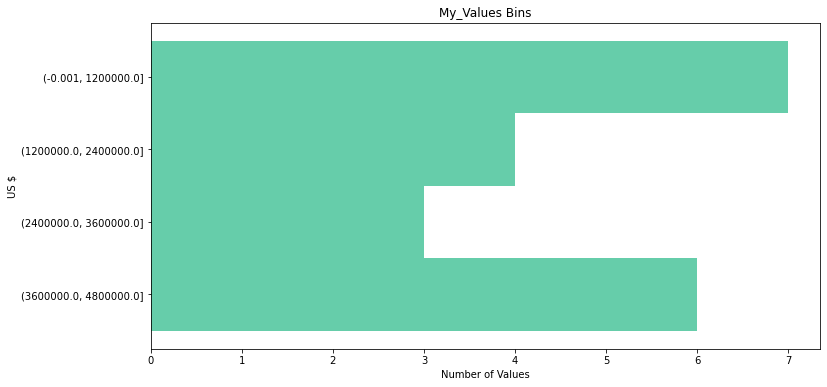

In [53]:
#Plot a histogram of the data. Be sure to include a title and axis labels.


float_values.value_counts(bins = [0, 1200000, 2400000, 3600000, 4800000]).sort_index(ascending = False).plot(kind='barh', color='mediumaquamarine',width =1)
plt.title("My_Values Bins")
plt.xlabel('Number of Values')
plt.ylabel('US $')


3.  Use pandas to create a Series from the following exam scores:

```[60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]```




In [57]:
#create list and convert it to panda Series

gr = [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
scores = pd.Series(gr)
scores

0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64

In [58]:
# A series was created:

type(scores)

pandas.core.series.Series

In [61]:
#What is the minimum exam score? The max, mean, median?
#    or I could have used scores.describe() for all but the median

min(scores), max(scores), np.mean(scores), np.median(scores)

(60, 96, 78.15, 79.0)

Text(0, 0.5, 'Number of Values')

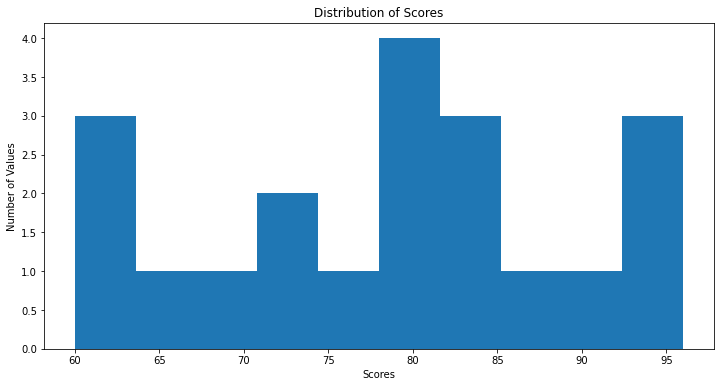

In [63]:
#Plot a histogram of the scores.
scores.plot.hist()
plt.title("Distribution of Scores")
plt.xlabel('Scores')
plt.ylabel('Number of Values')

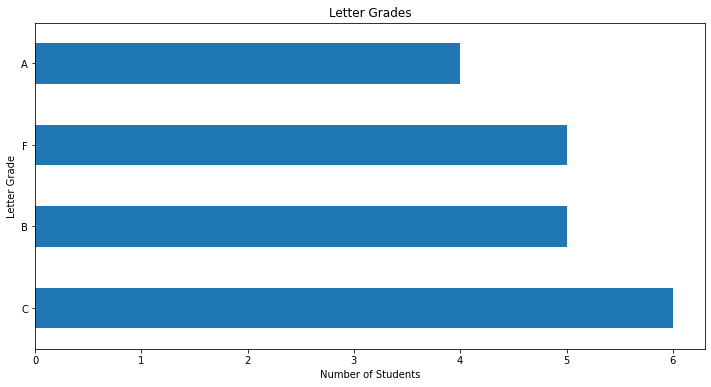

In [65]:
#Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.
bin_labels = ['F', 'C', 'B', 'A']
bin_edges = [0, 70, 80, 90, 100]
pd.cut(scores,bins = bin_edges, labels= bin_labels).value_counts().plot.barh()
plt.title('Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')
plt.show()


In [28]:
#Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.

In [69]:
curve = 100 - max(scores)
curved_scores = scores + curve

In [70]:
# Define bin edges.
bin_edges = [0, 70, 75, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

# Check out counts
pd.cut(curved_scores, bins=bin_edges, labels=bin_labels).value_counts().sort_index()

F    4
D    2
C    2
B    8
A    4
dtype: int64

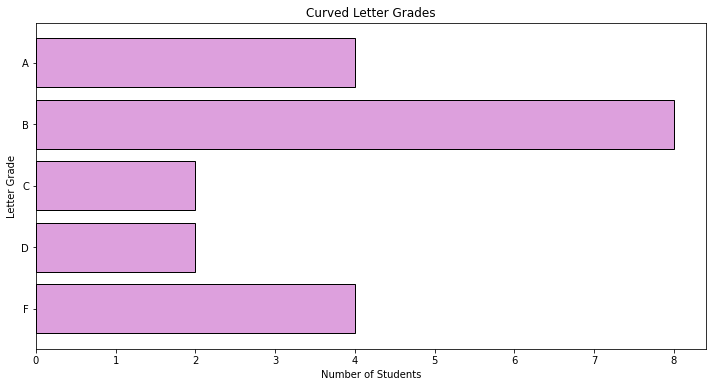

In [71]:
# Create and plot bins
pd.cut(curved_scores, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='plum',
                                                                  ec='black',
                                                                  width=.8)

plt.title('Curved Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')

plt.show()

4. Use pandas to create a Series from the following string:


```'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'```



In [72]:
string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

# Add a space between each letter, so we can split on that space

' '.join(string)


'h n v i d d u c k k q x w y m b i m k c c e x b k m q y g k x o y n d m c x n w q a r h y f f s j p s r a b t j z s y p m z a d f a v y r n n d n d v s w r e a u x o v n c x t w z p w e j i l z j r m m b b g b y x v j t e w q t h a f n b k q p l a r o k k y y d t u b b m n e x o y p u l z w f h q v c k d p q t p o p p z q r m c v h h p w g j w u p g z h i o f o h a w y t l s i y e c u p r o g u y'

In [73]:
# Create list of letters.

letters_list = ' '.join(string).split(' ')
letters_list[:5]

['h', 'n', 'v', 'i', 'd']

In [74]:
# Create Series of letters

letters = pd.Series(letters_list)
letters.head()

0    h
1    n
2    v
3    i
4    d
dtype: object

In [76]:
#What is the most frequently occurring letter? 
letters.value_counts().nlargest(n=1, keep='all')

y    13
dtype: int64

In [75]:
# Least frequently occurring?
letters.value_counts().nsmallest(n=1, keep='all')

l    4
dtype: int64

In [79]:
# How many vowels are in the list?

letters.str.lower().str.count(r'[aeiou]').sum()


34

In [80]:
# How many consonants are in the list?
# Note the addition of the ^ 

letters.str.lower().str.count(r'[^aeiou]').sum()

#print(len(letters) - sum(letters.str.count(r'[aeiou]')))

166

In [82]:
# Create a series that has all of the same letters, but uppercased

letters.str.upper()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

In [83]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.

letters.value_counts().head(7)

y    13
p    12
w    10
b     9
k     9
m     9
n     9
dtype: int64

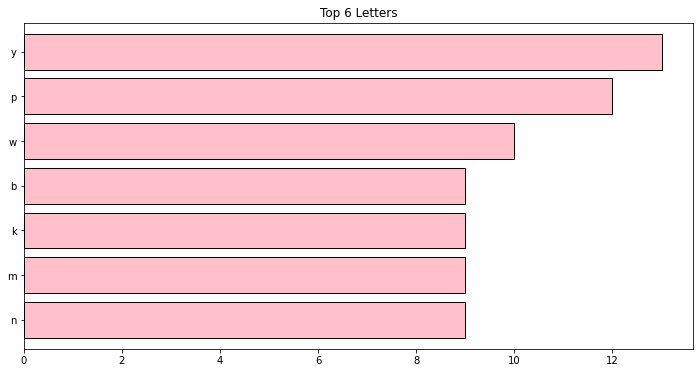

In [86]:
letters.value_counts().head(7).plot(kind = 'barh', color = 'pink', ec='black',width=.8)
plt.title("Top 6 Letters")

# My prefer to have most frequent letter at the top, so invert the y-axis.
plt.gca().invert_yaxis()

plt.show()

In [ ]:
# Seventeen Exercises - Student Walkthroughs!

In [87]:
a = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

b = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

In [88]:
fruits = pd.Series(a)
numbers = pd.Series(b)

In [90]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. Make a variable named uppercased_fruits to hold the output of the list comprehension. Output should be ['MANGO', 'KIWI', etc...]

uppercased_fruits = fruits.str.upper()
uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [91]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]

capitalized_fruits = fruits.str.title()
capitalized_fruits

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin Orange
dtype: object

In [98]:
# Exercise 3 - fruits_with_more_than_two_vowels.
# fruits[fruits.apply(lambda s: s.str.lower().str.count(r'[aeiou]'))]

vowel_counts = fruits.str.lower().str.count(r'[aeiou]')
fruits[vowel_counts > 2]



3              guava
4          pineapple
5    mandarin orange
dtype: object

In [100]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']

vowel_count = fruits.str.count('[aeiou]')
fruits[vowel_count > 2]

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [101]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters

fruits[fruits.str.len() > 5].unique()

array(['strawberry', 'pineapple', 'mandarin orange'], dtype=object)

In [102]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters

fruits[fruits.str.len() == 5].unique()


array(['mango', 'guava'], dtype=object)

In [103]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters

fruits[fruits.str.len() < 5].unique()

array(['kiwi'], dtype=object)

In [109]:
# Exercise 8 - Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]

fruits.str.len()


0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [140]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"

fruits.apply(lambda row: row.count('a'))
fruits[fruits.str.contains('a')]


0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [122]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 

even_numbers = list(numbers[numbers % 2 == 0])
even_numbers

[2, 4, 6, 8, 10, 256, -8, -4, -2]

In [121]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers.

odd_numbers = list(numbers[numbers % 2 == 1])
odd_numbers

[3, 5, 7, 9, 11, 13, 17, 19, 23, 5, -9]

In [123]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers

positive_numbers = list(numbers[numbers > 0])
positive_numbers

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, 5]

In [125]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers

negative_numbers = list(numbers[numbers < 0])

In [139]:
# Exercise 14 - produce a list of numbers with 2 or more numerals

#num_length = numbers.len()
# numbers[numbers.len() ]
numbers_2num = numbers[numbers > 10]
numbers_2num
     


9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

In [141]:
# Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]

numbers_squared = numbers.pow(2)
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [142]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.

num = numbers[(numbers % 2 != 0) & (numbers < 0)]
num


19   -9
dtype: int64

In [137]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five.

numbers_plus_5 = numbers + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64